# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [ ]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [ ]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

## Deliverable 1: Get a Summary DataFrame 

In [ ]:
#  1. Get the total rides for each city type
type_city_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_city_ride_count

In [ ]:
# 2. Get the total drivers for each city type
type_city_driver_count = city_data_df.groupby("type").sum()["driver_count"]
type_city_driver_count

In [ ]:
#  3. Get the total amount of fares for each city type
fares_city_type = pyber_data_df.groupby("type").sum()["fare"]
fares_city_type

In [ ]:
#  4. Get the average fare per ride for each city type. 
avg_fare_city_type = pyber_data_df.groupby("type").mean()["fare"]
avg_fare_city_type 

In [ ]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver_city_type = pyber_data_df.groupby("type").sum()["fare"]/type_city_driver_count
avg_fare_driver_city_type

In [ ]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": type_city_ride_count,
    "Total Drivers": type_city_driver_count,
    "Total Fares": fares_city_type,
    "Average Fare per Ride": avg_fare_city_type,
    "Average Fare per Driver": avg_fare_driver_city_type})
pyber_summary_df


In [ ]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [ ]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

In [ ]:
pyber_summary_df

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [ ]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_plot_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
fare_plot_df

In [ ]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_plot_df = fare_plot_df.reset_index()

In [ ]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_plot_piv = fare_plot_df.pivot(index = "date", columns = "type", values = "fare")
fare_plot_piv.head()

In [ ]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_plot_piv = fare_plot_piv.loc["2019-01-01":"2019-04-29"]
fare_plot_piv.head()

In [ ]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fare_plot_piv.index = pd.to_datetime(fare_plot_piv.index)

In [ ]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_plot_piv.info()

In [ ]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_plot_piv = fare_plot_piv.resample('W').sum()
fare_plot_piv.head()

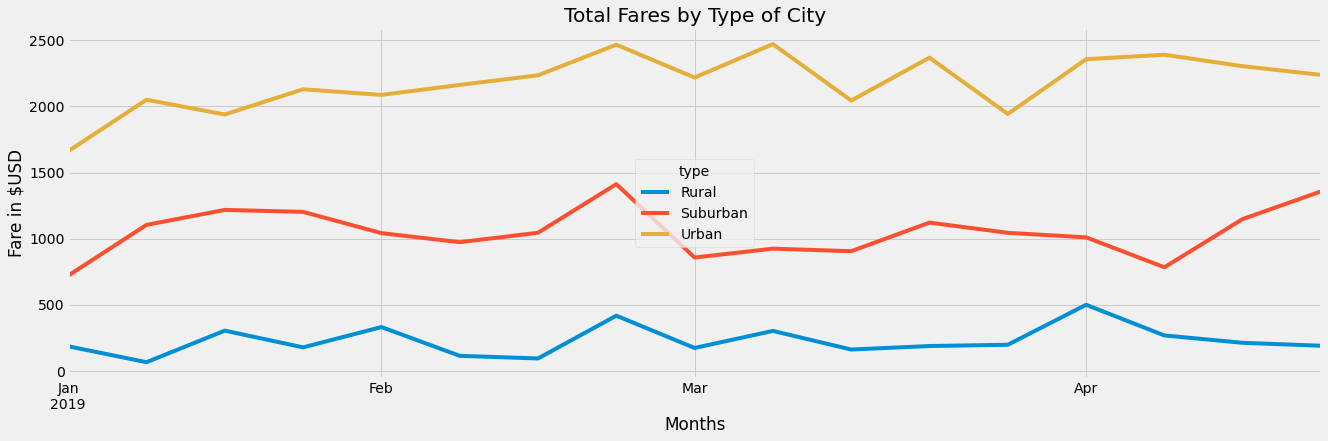

In [294]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax = fare_plot_piv.plot(figsize = (20,6))

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax.set_title("Total Fares by Type of City")
ax.set_xlabel("Months")
ax.set_ylabel("Fare in $USD")
plt.savefig("fareplot.png")
